<a href="https://colab.research.google.com/github/Ruchika810/ML-Classification/blob/main/Team_notebook_cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Dataset Information**

***Demographic:***

• **Sex:** male or female("M" or "F")

• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

***Behavioral***

• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes:** whether or not the patient had diabetes (Nominal) Medical(current)

• **Tot Chol:** total cholesterol level (Continuous)

• **Sys BP:** systolic blood pressure (Continuous)

• **Dia BP:** diastolic blood pressure (Continuous)

• **BMI:** Body Mass Index (Continuous)

• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose:** glucose level (Continuous)

***Predict variable (desired target)***

• **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -DV

# **Importing the required libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score,log_loss,recall_score,f1_score,precision_score,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Mounting the drive and reading the data**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading data
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

# **Dataset Inspection**

In [4]:
# Exploring the first five rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Exploring the last five rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(3390, 17)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# finding statistical measures of numerical columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Checking null value count of each column
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

*There are null values in **education, cigsPerDay, MPMeds, totChol, BMI, heartrate and glucose** columns. In the later steps we will use **KNN imputer** to treat these null values.*

In [10]:
df[df.duplicated()].sum()

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

*There are no duplicate rows in this dataset.*

In [11]:
df[df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


*As the persons who are smoking, the corresponding cigsPerDay column has null values, instead of making it zero we will use knn imputer to impute these values.*

# **Exploratory data analysis**

In [12]:
# Extracting names of numerical columns from the data
numeric_features = df.describe().columns[1:]

In [13]:
# Creating a list of continuous features
continuous_features = ['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

**Visualization of numeric features**

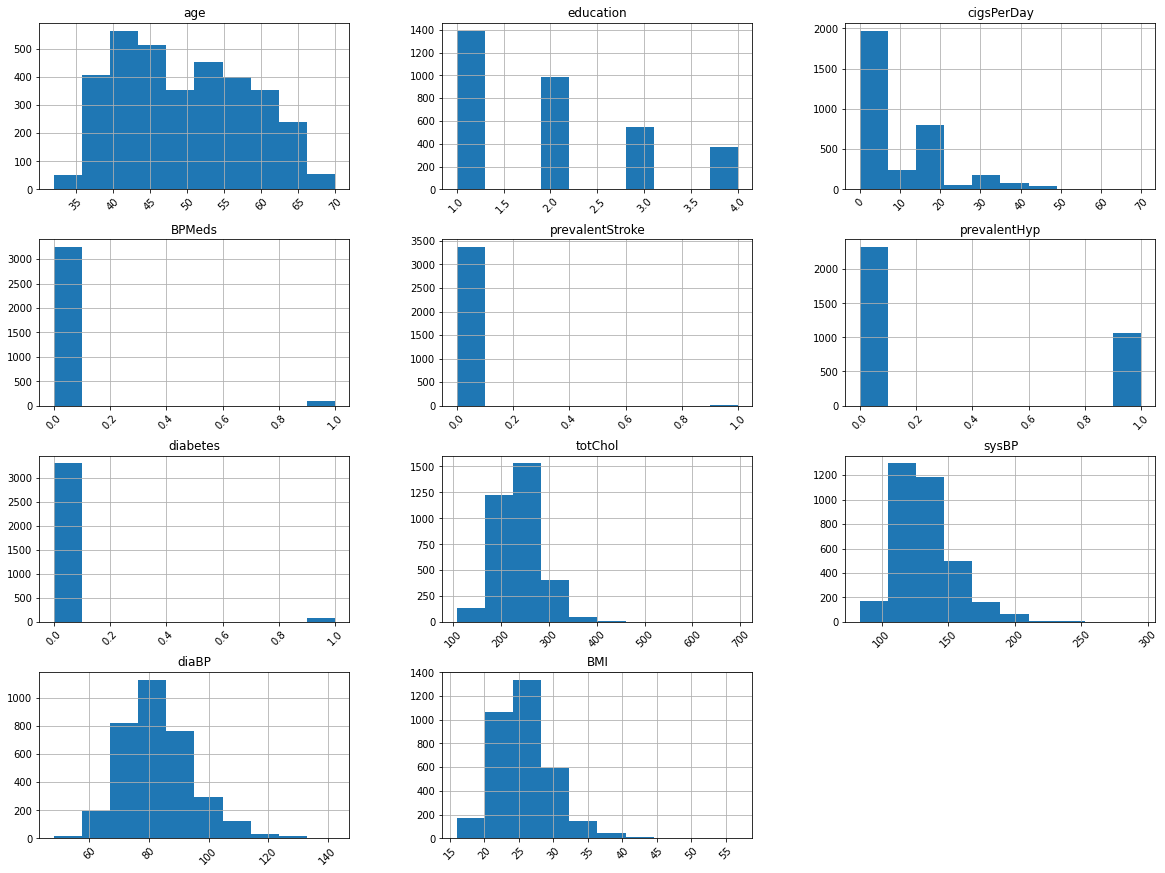

In [14]:
df.iloc[:,1:14].hist(figsize=(20,15), xrot=45)
plt.show()

* Dataset contains mostly the data of middle aged patients.
* Most of the patients are not on blood pressure medication.
* Most of the patients don't had any pervious strokes and diabetes.
* More than 1000 patients were hypertensive.
* Most of the patients have total cholesterol level of 160 to 280.
* Most of the patients have systolic blood pressure around 100 to 150 and diastolic blood pressure around 65 to 95.
* BMI of most of the patients lies in the range of 20 to 30.



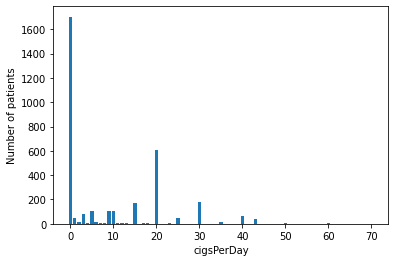

In [15]:
# Inspecting cigsPerDay column using bar plot
plt.bar(df['cigsPerDay'].value_counts().keys(),df['cigsPerDay'].value_counts())
plt.xlabel('cigsPerDay')
plt.ylabel('Number of patients')
plt.show()

*There are more than 50% patients who don't smoke cigarette and there are more than 600 patients who smoke on an average 20 cigarettes per day.*

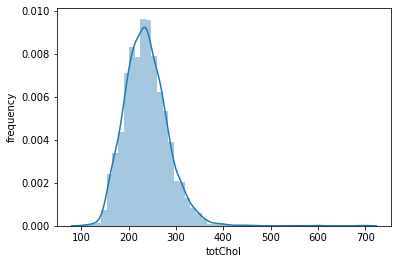

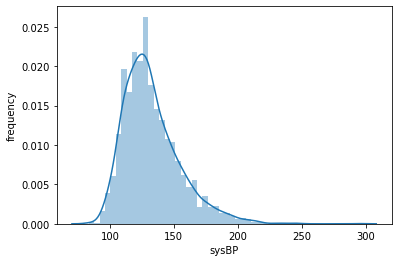

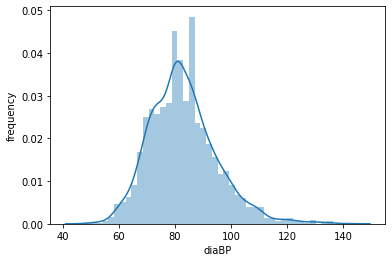

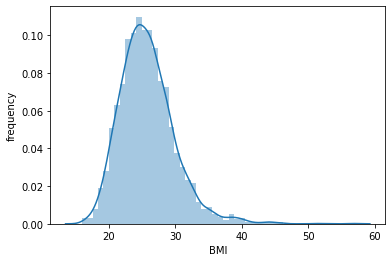

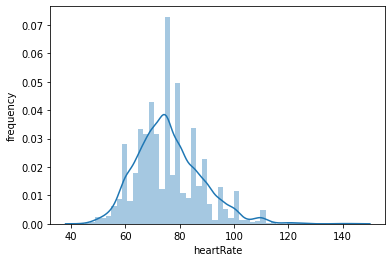

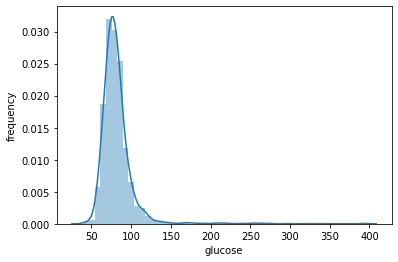

In [16]:
# Visualization of distribution of continuous features
for var in continuous_features:
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('frequency')
    fig.set_xlabel(var)

    plt.show()

*Features like diaBP and heartRate are slitely right skewed and all other features are highly right skewed. So we will apply log transformation on all the features to make their distributions normal.*

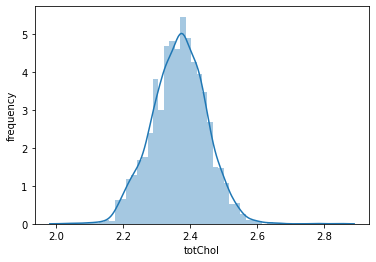

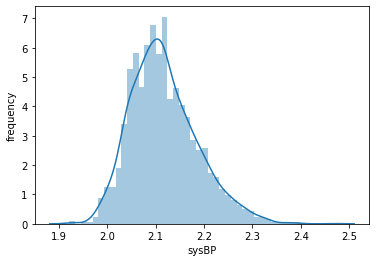

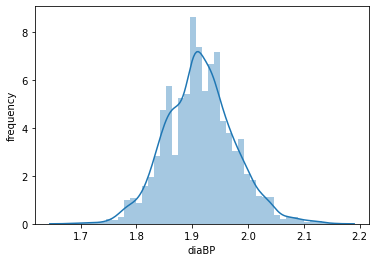

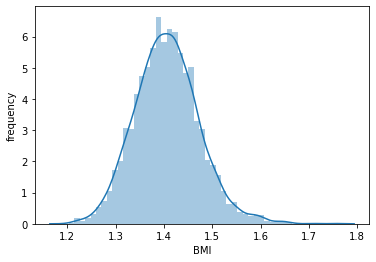

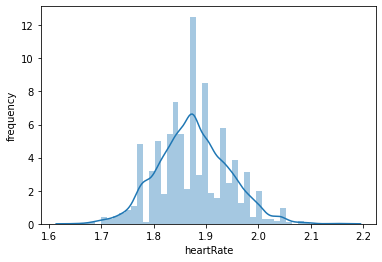

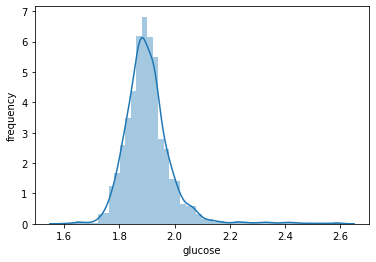

In [17]:
# Visualization of distribution of continuous features after log transformation
for var in continuous_features:
    fig = sns.distplot(np.log10(df[var]).dropna())
    fig.set_ylabel('frequency')
    fig.set_xlabel(var)

    plt.show()

*After transformation most of the features became normal. We will use these transformed data to fit various models.*

**Visulalization of categorical features**

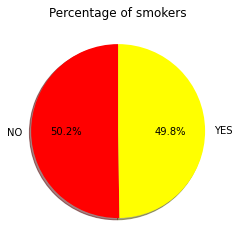

In [18]:
#Creating a pie chart for 'is_smoking' feature
colors = ['red', 'yellow']
plt.pie(df['is_smoking'].value_counts(), labels=df['is_smoking'].value_counts().keys(),colors=colors,
        shadow=True, startangle=90,autopct='%.1f%%')
plt.title("Percentage of smokers")
plt.show()

*The proportion of smoker and non-smoker are almost same.*

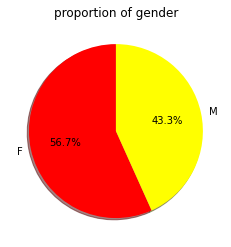

In [19]:
#Creating a pie chart for 'sex' feature
colors = ['red', 'yellow']
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().keys(),colors=colors,
        shadow=True, startangle=90,autopct='%.1f%%')
plt.title("proportion of gender")
plt.show()

*There are more female patients than male patients.*

**dependent variable**

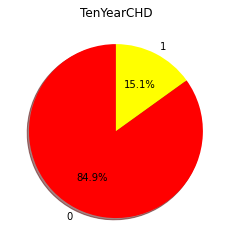

In [20]:
#Creating a pie chart
colors = ['red', 'yellow']
plt.pie(df['TenYearCHD'].value_counts(), labels=df['TenYearCHD'].value_counts().keys(),colors=colors,
        shadow=True, startangle=90, autopct='%.1f%%')
plt.title("TenYearCHD")
plt.show()

*The dataset is heavily imbalanced.There are very less data (around 15%) for the patients who had 10-year risk of coronary heart disease.*

**Relation between numeric features and dependent variable**

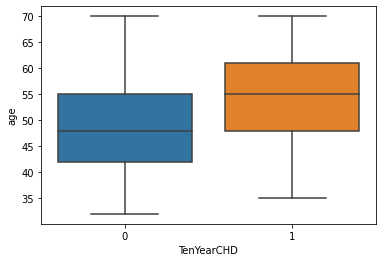

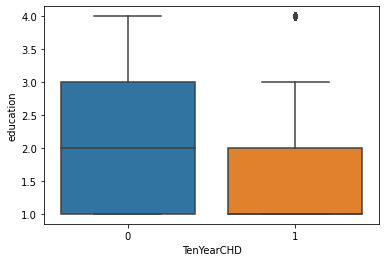

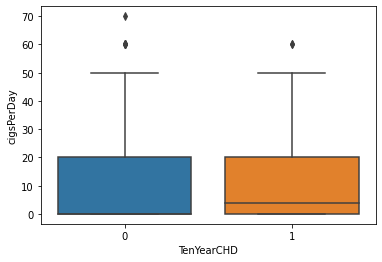

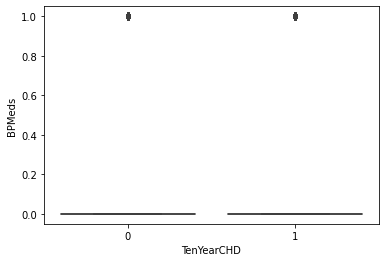

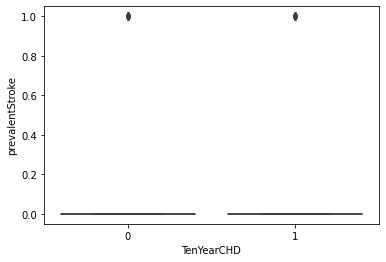

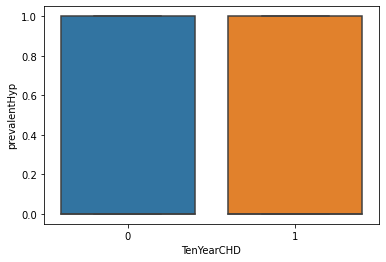

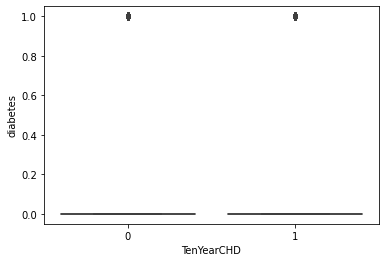

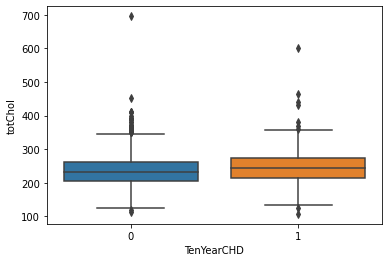

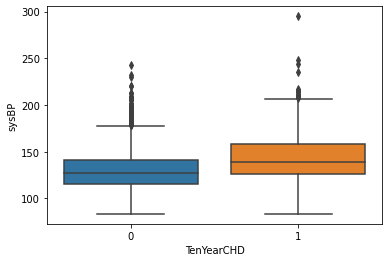

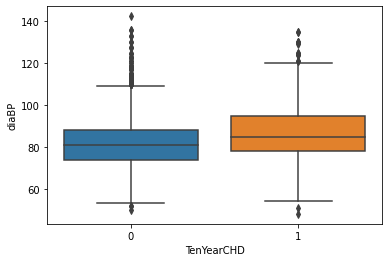

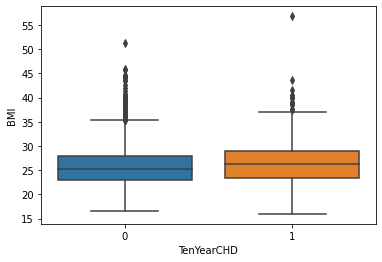

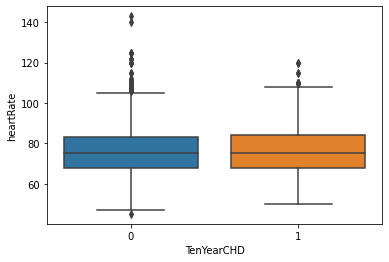

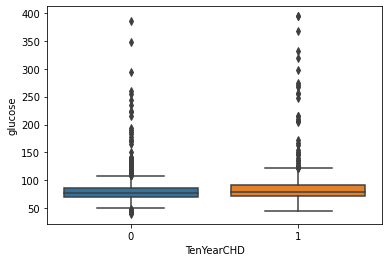

In [21]:
# Creating box plot of numeric features vs TenYearCHD
num_cols = [i for i in numeric_features if i not in ['TenYearCHD']]
for col in num_cols:
    sns.boxplot(y = col, x = df['TenYearCHD'].astype('category'), data=df)
    plt.show()

* Features like age, sysBP, diaBP and BMI are affecting more the dependent variable. This thing will be more clear when we visulalize the correlation matrix.

* Age is higher for the patients who have 10 year risk of CHD.

* Total cholestrol, sysBP, diaBP, BMI and glucose are slightly higher in case of the patients who have 10 year risk of CHD.



**Relationship between categorical features and dependent variable**

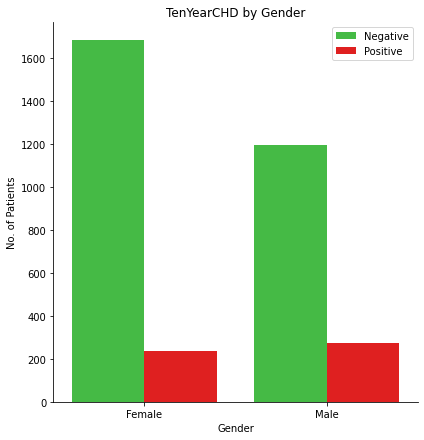

In [22]:
# Gender vs TenYearCHD
sns.catplot(x='sex', hue='TenYearCHD', data=df, kind='count', size=6,
            palette=sns.color_palette(['limegreen', 'red']), legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Negative', 'Positive'])
plt.title('TenYearCHD by Gender')
plt.show()


**10 year risk of CHD is slightly more in case of male patients.**

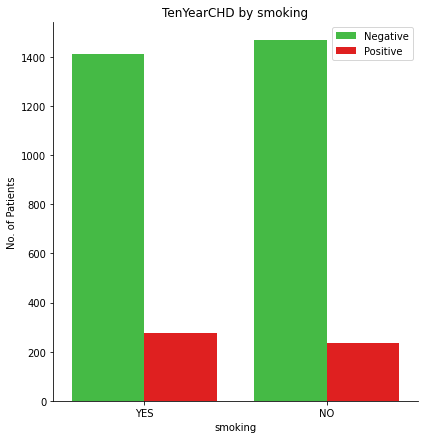

In [23]:
# Gender vs CHD
sns.catplot(x='is_smoking', hue='TenYearCHD', data=df, kind='count',
            palette=sns.color_palette(['limegreen', 'red']),size=6, legend=False)
plt.xlabel('smoking')
plt.xticks(ticks=[0,1], labels=['YES', 'NO'])
plt.ylabel('No. of Patients')
plt.legend(['Negative', 'Positive'])
plt.title('TenYearCHD by smoking')
plt.show()

**10 year risk of CHD is slightly more in case of patients who smokes.**

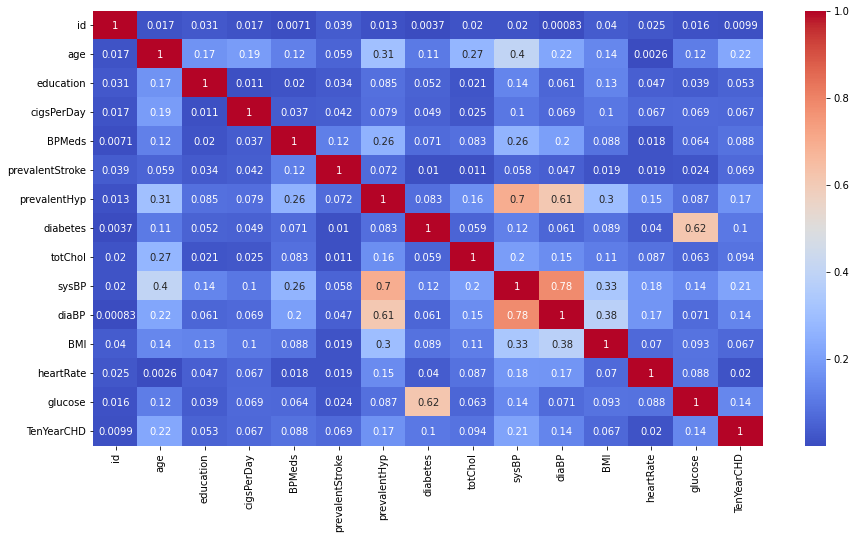

In [24]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

Features like sysBP and diaBP are highly correlated with each other, so to remove multicolinearity we will combine these two feature by taking average. Also prevalentHyp is highly correlated with sysBP and diaBP.

Glucose and diabetes are also highly correlated with each other.





# **Feature Engineering**

In [25]:
# Creating a new feature 'BP' by taking avarge of sysBP and diaBP
df['BP'] = (df['diaBP']+df['sysBP'])/2

In [26]:
# log transformation of right skewed continuous features
df['totChol'] = np.log10(df['totChol'])
df['sysBP'] = np.log10(df['sysBP'])
df['diaBP'] = np.log10(df['diaBP'])
df['BMI'] = np.log10(df['BMI'])
df['heartRate'] = np.log10(df['heartRate'])
df['glucose'] = np.log10(df['glucose'])

In [27]:
# Converting categorical features to numeric 
#label encoding
encoders_nums = {"sex":{"M":1,"F":0} ,"is_smoking":{"YES":1,"NO":0}}
df= df.replace(encoders_nums)

In [28]:
# Creating a new dataframe which include the relevent features. 
df1 = df[['age', 'cigsPerDay', 'BPMeds','sex',
          'prevalentHyp','prevalentStroke', 'diabetes',
          'BP', 'totChol','BMI', 'heartRate', 'glucose','TenYearCHD']]

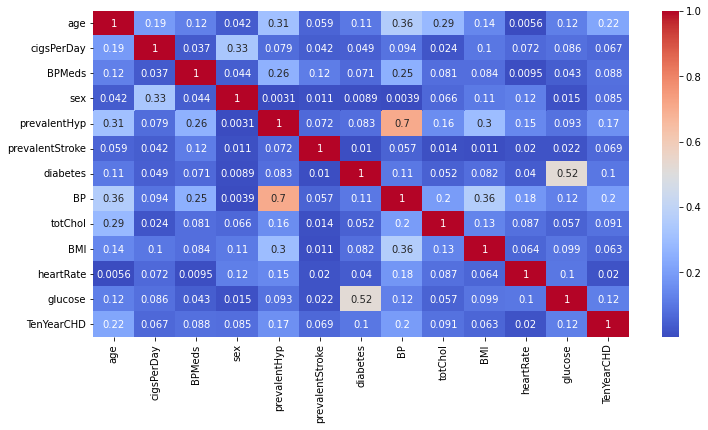

In [29]:
## Correlation matrix
plt.figure(figsize=(12,6))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [30]:
df1.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,3.0,0.0,0,0,0,0,116.50,2.344392,NaN,1.954243,1.903090,1
1,36,0.0,0.0,1,1,0,0,133.00,2.326336,1.473779,1.857332,1.875061,0
2,46,10.0,0.0,0,0,0,0,93.50,2.397940,1.308564,1.944483,1.973128,0
3,50,20.0,0.0,1,1,0,0,123.00,2.367356,1.451172,1.832509,1.973128,1
4,64,30.0,0.0,0,0,0,0,110.75,2.382017,1.421933,1.845098,1.886491,0


**Imputation of null values**

In this step we will use KNN imputer with n_neighbors=1 to impute null values. 

In [31]:
# defining imputer
imputer = KNNImputer(n_neighbors=1)
df2 = pd.DataFrame(imputer.fit_transform(df1.values))

In [32]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,64.0,3.0,0.0,0.0,0.0,0.0,0.0,116.50,2.344392,1.457731,1.954243,1.903090,1.0
1,36.0,0.0,0.0,1.0,1.0,0.0,0.0,133.00,2.326336,1.473779,1.857332,1.875061,0.0
2,46.0,10.0,0.0,0.0,0.0,0.0,0.0,93.50,2.397940,1.308564,1.944483,1.973128,0.0
3,50.0,20.0,0.0,1.0,1.0,0.0,0.0,123.00,2.367356,1.451172,1.832509,1.973128,1.0
4,64.0,30.0,0.0,0.0,0.0,0.0,0.0,110.75,2.382017,1.421933,1.845098,1.886491,0.0


In [33]:
# Changing the column name of newly formed dataframe
df2 = df2.rename({0: 'age', 1: 'cigsPerDay',2: 'BPMeds', 3: 'sex',
                  4: 'prevalentHyp', 5: 'prevalentStroke',6: 'diabetes',
                  7: 'BP',8: 'totChol', 9: 'BMI', 10: 'heartRate', 11: 'glucose', 12: 'TenYearCHD'}, axis=1)

In [34]:
df2.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose,TenYearCHD
0,64.0,3.0,0.0,0.0,0.0,0.0,0.0,116.50,2.344392,1.457731,1.954243,1.903090,1.0
1,36.0,0.0,0.0,1.0,1.0,0.0,0.0,133.00,2.326336,1.473779,1.857332,1.875061,0.0
2,46.0,10.0,0.0,0.0,0.0,0.0,0.0,93.50,2.397940,1.308564,1.944483,1.973128,0.0
3,50.0,20.0,0.0,1.0,1.0,0.0,0.0,123.00,2.367356,1.451172,1.832509,1.973128,1.0
4,64.0,30.0,0.0,0.0,0.0,0.0,0.0,110.75,2.382017,1.421933,1.845098,1.886491,0.0


In [35]:
# creating feature set
X = df2.iloc[:,:12].apply(zscore)

In [36]:
y = df2['TenYearCHD'].values

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=1)

In [38]:
X_test.shape, X_train.shape

((678, 12), (2712, 12))

# **Logistic Regression**

As our dataset is imbalanced, we will wse call_weight = 'balance' parameter to fit the logistic regression model. 

In [39]:
# Instantiating logistic regression classifier
lr_clf = LogisticRegression(class_weight='balanced')

In [40]:
# Fitting the model
lr_clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [41]:
# Get the predicted probabilities
lr_train_preds = lr_clf.predict_proba(X_train)[:,1]
lr_test_preds = lr_clf.predict_proba(X_test)[:,1]

In [42]:
# Get the predicted classes
lr_train_class_preds = lr_clf.predict(X_train)
lr_test_class_preds = lr_clf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       581
         1.0       0.26      0.72      0.38        97

    accuracy                           0.66       678
   macro avg       0.60      0.69      0.57       678
weighted avg       0.84      0.66      0.71       678



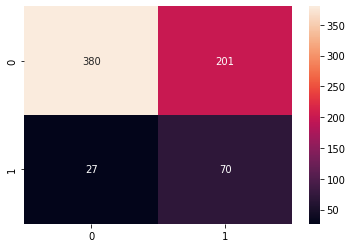

In [43]:
# Classification report
print(classification_report(y_test, lr_test_class_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, lr_test_class_preds), annot=True, fmt='d')
plt.show()

In [44]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr_clf.coef_))], axis = 1)

In [45]:
coef = coefficients.iloc[:,0]
val = coefficients.iloc[:,1]

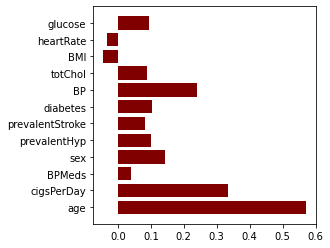

In [46]:
# creating the bar plot of feature importance
fig_dims = (4,4)
fig = plt.subplots(figsize=fig_dims)
plt.barh(coef, val, color ='maroon')
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.755


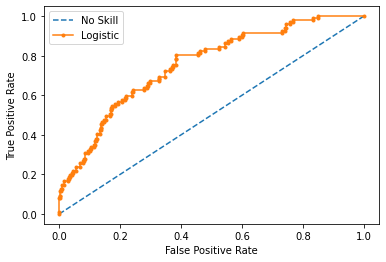

In [47]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_test_preds)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_test_preds)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic regression is producing a good balanced result with AUC ROC score of 0.75. 'Age', 'cigsPerDay', 'sex', 'BP' are the most important features given by the model.

# **Logistic Regression GridSearchCV**

To improve the model we have tried to tune the hyperparameters using GridSearchCV.

In [48]:
# Instantiating logistic regression classifier
lr_cv_clf = LogisticRegression(class_weight='balanced')

In [49]:
# Defining parameter list to perform GridSearchCV
param_dict = {'penalty': ['l2','l1'], 'C': [0.001,0.01,0.1,1,10,100,1000],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
# GridSearchCV
lr_grid = GridSearchCV(estimator=lr_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='recall')

In [50]:
# Getting best estimator from GridSearch
lr_grid.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [51]:
# Getting the predicted probabilities
lr_cv_train_preds = lr_grid.predict_proba(X_train)[:,1]
lr_cv_test_preds = lr_grid.predict_proba(X_test)[:,1]

In [52]:
# Getting the predicted classes
lr_cv_train_class_preds = lr_grid.predict(X_train)
lr_cv_test_class_preds = lr_grid.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.94      0.59      0.72       581
         1.0       0.24      0.78      0.37        97

    accuracy                           0.61       678
   macro avg       0.59      0.68      0.54       678
weighted avg       0.84      0.61      0.67       678



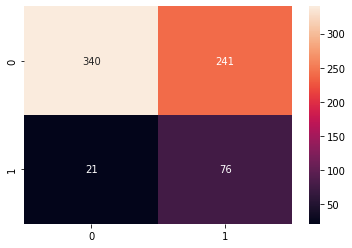

In [53]:
# Classification report
print(classification_report(y_test, lr_cv_test_class_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, lr_cv_test_class_preds), annot=True, fmt='d')
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.750


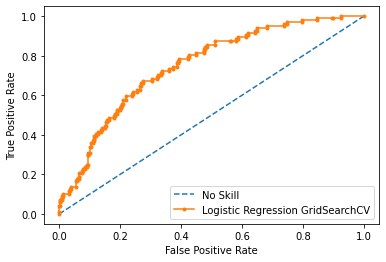

In [54]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_cv_test_preds)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_cv_test_preds)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression GridSearchCV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

It slightly increased the recall score with same AUC ROC score.

# **Logistic Regression 2**

Here we will try to increase the recall score of the logistic regression model by changing the default threshold.

In [55]:
# Instantiating logistic regression classifier
lr_clf = LogisticRegression(class_weight='balanced')

In [56]:
# Fitting the model
lr_clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [57]:
# Getting the predicted probabilities
lr_train_preds = lr_clf.predict_proba(X_train)[:,1]
lr_test_preds = lr_clf.predict_proba(X_test)[:,1]

In [58]:
lr_train_preds

array([0.58253873, 0.60110224, 0.80179124, ..., 0.38499376, 0.21771229,
       0.47510746])

In [59]:
# Getting the predicted classes
lr_train_class_preds = np.where(lr_clf.predict_proba(X_train)[:,1] > 0.25, 1, 0)
lr_test_class_preds = np.where(lr_clf.predict_proba(X_test)[:,1] > 0.25, 1, 0)

In [60]:
lr_train_class_preds

array([1, 1, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

         0.0       0.98      0.20      0.33       581
         1.0       0.17      0.98      0.29        97

    accuracy                           0.31       678
   macro avg       0.58      0.59      0.31       678
weighted avg       0.87      0.31      0.33       678



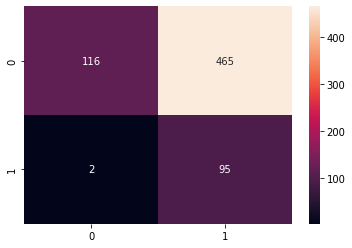

In [61]:
# Classification report
print(classification_report(y_test, lr_test_class_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, lr_test_class_preds), annot=True, fmt='d')
plt.show()

We have successfully increased the recall score but the false positive cases increased.

# **Decision Tree**

In [62]:
# Instantiating decision tree classifier
dt_clf = DecisionTreeClassifier(max_depth = 4,class_weight='balanced',random_state = 20)

In [63]:
# Fitting the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=20)

In [64]:
# Get the predicted classes
dt_train_preds = dt_clf.predict(X_train)
dt_test_preds = dt_clf.predict(X_test)

In [65]:
dt_test_prob = dt_clf.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71       581
         1.0       0.23      0.76      0.35        97

    accuracy                           0.60       678
   macro avg       0.58      0.67      0.53       678
weighted avg       0.83      0.60      0.66       678



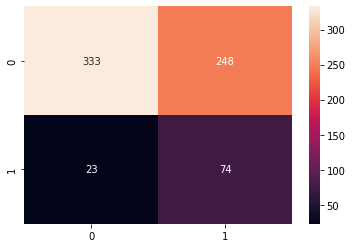

In [66]:
# Classification report
print (classification_report(y_test, dt_test_preds))

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, dt_test_preds), annot=True, fmt='d')

plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.693


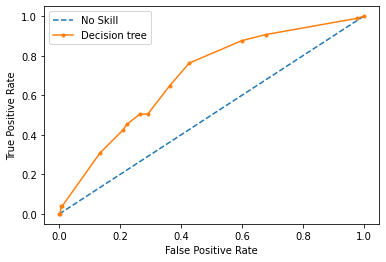

In [67]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, dt_test_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, dt_test_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [68]:
features = X_train.columns
importances = dt_clf.feature_importances_
indices = np.argsort(importances)

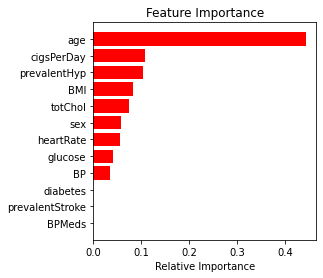

In [69]:
# Plotting feature importance
fig_dims = (4,4)
fig = plt.subplots(figsize=fig_dims)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

This model is giving overall balanced result with auc roc score of 0.69. 

# **Decision tree gridSearchCV**

In [70]:
# Instantiating decision tree classifier
dt_cv_clf = DecisionTreeClassifier(random_state = 20,class_weight='balanced')

In [71]:
# Defining parameter list to perform GridSearchCV
param_dict = {'ccp_alpha': [0.1, 0.01, 0.001],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 6, 7, 8, 9],
              'max_features': ['auto', 'sqrt', 'log2']}
# GridSearchCV
dt_grid = GridSearchCV(estimator=dt_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=20),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='recall')

In [72]:
# Getting best estimator from GridSearch
dt_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features='auto', random_state=20)

In [73]:
# Get the predicted classes
dt_cv_train_preds = dt_grid.predict(X_train)
dt_cv_test_preds = dt_grid.predict(X_test)

In [74]:
dt_cv_test_prob = dt_grid.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

         0.0       0.95      0.32      0.48       581
         1.0       0.18      0.90      0.30        97

    accuracy                           0.40       678
   macro avg       0.56      0.61      0.39       678
weighted avg       0.84      0.40      0.45       678



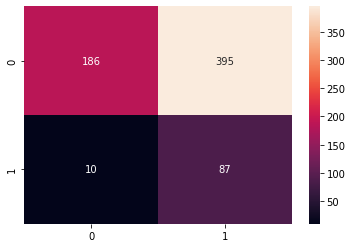

In [75]:
print (classification_report(y_test, dt_cv_test_preds))

sns.heatmap(confusion_matrix(y_test, dt_cv_test_preds), annot=True, fmt='d')
plt.show()

No Skill: ROC AUC=0.500
Decision tree: ROC AUC=0.648


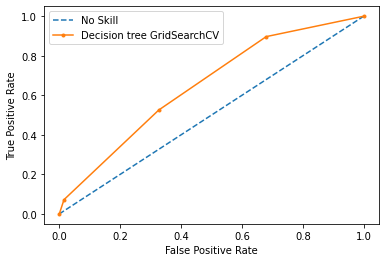

In [76]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, dt_cv_test_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, dt_cv_test_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree GridSearchCV')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [77]:
features = X_train.columns
importances = dt_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

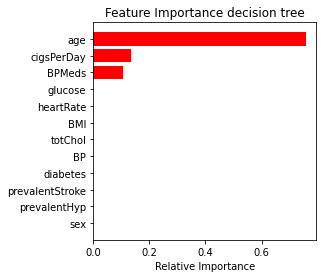

In [78]:
# Plotting feature importance
fig_dims = (4,4)
fig = plt.subplots(figsize=fig_dims)
plt.title('Feature Importance decision tree')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

* This model is giving good recall score.
* Age and cidsPerDay are the two important features given by this model.

# **Random Forest**

In [79]:
# Instantiating random forest classifier
rf_cv_clf = RandomForestClassifier(random_state = 20,class_weight='balanced')

In [80]:
# Defining parameter list to perform GridSearchCV
param_dict = {'n_estimators': [200,300,400],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
# GridSearchCV
rf_grid = GridSearchCV(estimator=rf_cv_clf,param_grid = param_dict,scoring='recall', cv=5)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400]},
             scoring='recall')

In [81]:
# Getting best estimator from GridSearch
rf_grid.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=400, random_state=20)

In [82]:
# Getting the predicted classes
rf_cv_train_preds = rf_grid.predict(X_train)
rf_cv_test_preds = rf_grid.predict(X_test)

In [83]:
rf_cv_test_prob = rf_grid.predict_proba(X_test)[:,1]

No Skill: ROC AUC=0.500
Random forest: ROC AUC=0.743


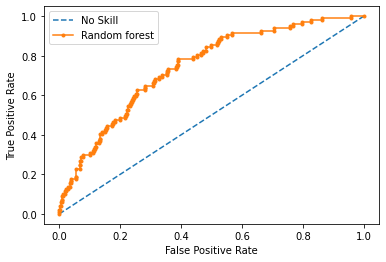

In [84]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_cv_test_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_cv_test_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81       581
         1.0       0.28      0.63      0.38        97

    accuracy                           0.71       678
   macro avg       0.60      0.68      0.60       678
weighted avg       0.83      0.71      0.75       678



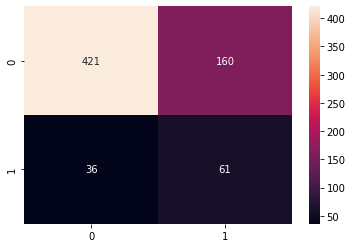

In [85]:
# Classification report
print (classification_report(y_test, rf_cv_test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, rf_cv_test_preds), annot=True, fmt='d')
plt.show()

In [86]:
print('AUC ROC score is:', roc_auc_score(y_test,rf_cv_test_preds))

AUC ROC score is: 0.6767393580211863


In [87]:
features = X_train.columns
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

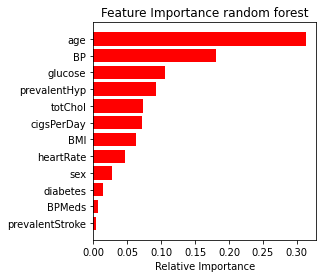

In [88]:
# Plotting feature importance
fig_dims = (4,4)
fig = plt.subplots(figsize=fig_dims)
plt.title('Feature Importance random forest')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **XGBoost**

In [89]:
# Instantiating XGBoost classifier
xgb_cv_clf = xgb.XGBClassifier(random_state=20)

In [90]:
# Defining parameter list to perform GridSearchCV
param_dict = {'gamma': [0.1,0.2,0.4,0.8,1.6, 200],
              'learning_rate': [0.01, 0.03, 0.1, 0.4, 0.5, 0.6],
              'max_depth': [5,6,7,10,11,12],
              'n_estimators': [50,65,100,115,130]}
# GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb_cv_clf,param_grid = param_dict,scoring = 'recall', cv=3)
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(random_state=20),
             param_grid={'gamma': [0.1, 0.2, 0.4, 0.8, 1.6, 200],
                         'learning_rate': [0.01, 0.03, 0.1, 0.4, 0.5, 0.6],
                         'max_depth': [5, 6, 7, 10, 11, 12],
                         'n_estimators': [50, 65, 100, 115, 130]},
             scoring='recall')

In [91]:
# Getting best estimator from GridSearch
xgb_grid.best_estimator_

XGBClassifier(gamma=0.1, learning_rate=0.5, max_depth=6, n_estimators=65,
              random_state=20)

In [92]:
# Getting the predicted classes
xgb_cv_train_preds = xgb_grid.predict(X_train)
xgb_cv_test_preds = xgb_grid.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       581
         1.0       0.26      0.11      0.16        97

    accuracy                           0.83       678
   macro avg       0.56      0.53      0.53       678
weighted avg       0.78      0.83      0.80       678



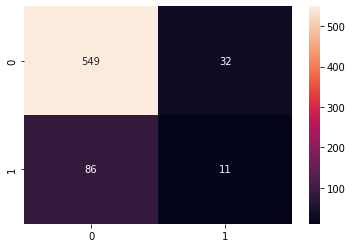

In [93]:
print (classification_report(y_test, xgb_cv_test_preds))

sns.heatmap(confusion_matrix(y_test, xgb_cv_test_preds), annot=True, fmt='d')
plt.show()

In [94]:
print('AUC ROC score is:', roc_auc_score(y_test,xgb_cv_test_preds))

AUC ROC score is: 0.529162304593928


In [95]:
#Applying SMOTE
smote = SMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_resample(X_train, y_train)

In [96]:
est_reg = xgb.XGBClassifier(class_weight='balanced', gamma=1.6, learning_rate=0.03,max_depth=5,).fit(x_s_res, y_s_res)
est_pred = est_reg.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.91      0.77      0.84       581
         1.0       0.29      0.56      0.38        97

    accuracy                           0.74       678
   macro avg       0.60      0.66      0.61       678
weighted avg       0.82      0.74      0.77       678



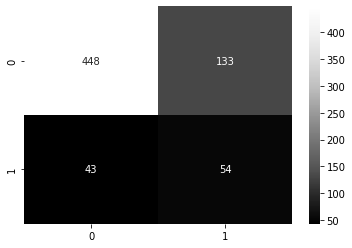

In [97]:
#Classification report
print (classification_report(y_test, est_pred))
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, est_pred), annot=True, cmap='Greys_r', fmt='d')
plt.show()

In [98]:
features = X_train.columns
importances = est_reg.feature_importances_
indices = np.argsort(importances)

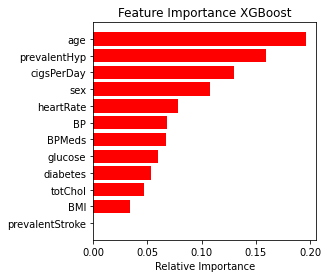

In [99]:
# Plotting feature importance
fig_dims = (4,4)
fig = plt.subplots(figsize=fig_dims)
plt.title('Feature Importance XGBoost')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Support vector classifier**

In [100]:
# train the model on train set
model = SVC(kernel='linear',class_weight='balanced', probability=True)
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76       581
         1.0       0.26      0.75      0.38        97

    accuracy                           0.65       678
   macro avg       0.60      0.69      0.57       678
weighted avg       0.84      0.65      0.71       678



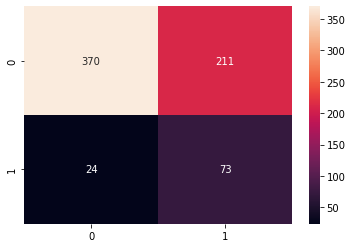

In [101]:
# Classification report
print (classification_report(y_test, predictions))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()

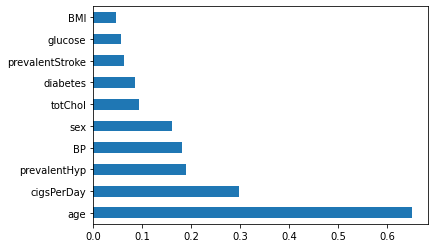

In [102]:
pd.Series(abs(model.coef_[0]), index=X_train.columns).nlargest(10).plot(kind='barh')
plt.show()

In [103]:
prediction_prob = model.predict_proba(X_test)[:,1]

In [104]:
# Instantiating SVM classifier
svm_cv_clf = SVC(random_state=20, class_weight = 'balanced',probability=True)

In [105]:
# Defining parameter list to perform GridSearchCV
param_dict = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf','linear']}
# GridSearchCV
svm_grid = GridSearchCV(estimator=svm_cv_clf,param_grid = param_dict, scoring = 'f1', cv=3)
svm_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=20),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             scoring='f1')

In [106]:
# Getting best estimator from GridSearch
svm_grid.best_estimator_

SVC(C=0.1, class_weight='balanced', probability=True, random_state=20)

In [107]:
# Get the predicted classes
svm_cv_train_preds = svm_grid.predict(X_train)
svm_cv_test_preds = svm_grid.predict(X_test)

In [108]:
prediction_prob_cv = svm_grid.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

         0.0       0.94      0.61      0.74       581
         1.0       0.25      0.76      0.37        97

    accuracy                           0.63       678
   macro avg       0.59      0.69      0.56       678
weighted avg       0.84      0.63      0.69       678



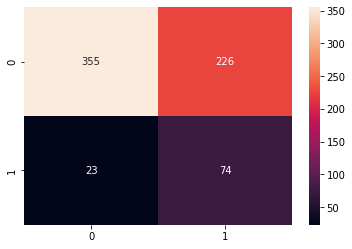

In [109]:
# Classification report
print (classification_report(y_test, svm_cv_test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, svm_cv_test_preds), annot=True, fmt='d')
plt.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.687


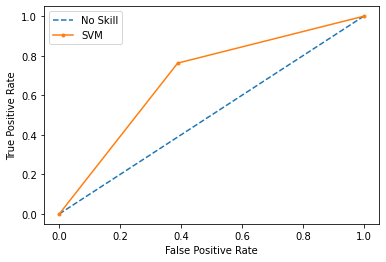

In [110]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, svm_cv_test_preds)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, svm_cv_test_preds)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **KNN**

In [111]:
# Instantiating KNN classifier
knn_cv_clf = KNeighborsClassifier()

In [112]:
# Defining parameter list to perform GridSearchCV
param_dict = {'n_neighbors' : [1,3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
# GridSearchCV
knn_grid = GridSearchCV(estimator=knn_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [113]:
# Getting best estimator from GridSearch
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [114]:
# Get the predicted classes
knn_cv_train_preds = knn_grid.predict(X_train)
knn_cv_test_preds = knn_grid.predict(X_test)

In [115]:
prediction_prob_cv = knn_grid.predict_proba(X_test)[:,1]

In [116]:
print('AUC ROC score is:', roc_auc_score(y_test,prediction_prob_cv))

AUC ROC score is: 0.554021683198183


              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       581
         1.0       0.24      0.23      0.23        97

    accuracy                           0.79       678
   macro avg       0.56      0.55      0.56       678
weighted avg       0.78      0.79      0.78       678



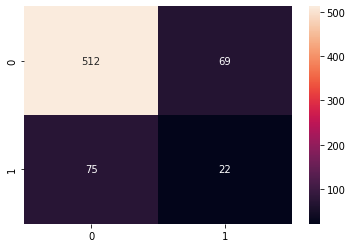

In [117]:
# Classification report
print (classification_report(y_test, knn_cv_test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, knn_cv_test_preds), annot=True, fmt='d')
plt.show()

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.554


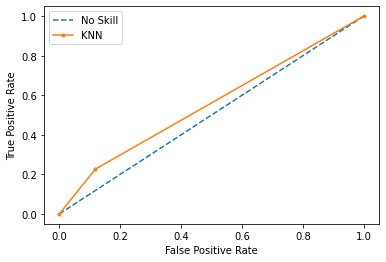

In [118]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, knn_cv_test_preds)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, knn_cv_test_preds)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **Conclusion**

* Age and cigsPerDay are the two most important features given by most of the models. 
* Logistic regression, random forest and support vector machine models are giving a good overall balanced result.
* Models like decision tree and logistic regression(by changing threshold) are giving very good recall score but they are certainly increasing the false positive predictions.
